## Asset Warranty and Purchase Date Analysis (Flag 65)

### Dataset Description
The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `alm_hardware` table with 500 entries. The assets alm_hardware table, consists of detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'role', 'email', 'start_date', and 'department', providing insights into the user profiles managed within the ServiceNow system.

### Your Task
**Goal**: To explore and understand the correlation between asset purchase dates, warranty periods, and employee start dates to optimize asset procurement and warranty management.

**Role**: Procurement Analyst

**Difficulty**: 3 out of 5. This analysis requires a detailed examination of temporal data and correlation patterns.

**Category**: Asset Management & User Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [13]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the asset analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. This also checks the initial few rows to verify the correct loading of the data.

In [14]:
dataset_path = "csvs/flag-65.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()

,sys_updated_on,serial_number,purchased_on,asset_tag,warranty_expiration,assigned_to,department,cost,model_category,display_name,ci
0,2024-03-02 21:31:00,OYK-77215827,2024-02-29 21:31:00,P1000000,2026-11-19 21:31:00,Fannie Steese,Customer Support,4808,Computer,Dell Inspiron 15 Computer,Inspiron 15
1,2023-07-04 16:13:00,MOG-23425821,2023-06-30 16:13:00,P1000001,2024-10-21 16:13:00,Emilia Oxley,Customer Support,4799,Computer,Dell OptiPlex 980 Desktop Computer,OptiPlex 980
2,2023-10-22 06:03:00,OBU-72808441,2023-10-19 06:03:00,P1000002,2025-06-02 06:03:00,Darrel Tork,Customer Support,3303,Computer,Dell Inspiron 1525,Inspiron 1525
3,2023-12-28 05:06:00,JJA-59360711,2023-12-27 05:06:00,P1000003,2026-01-21 05:06:00,Jonathon Waldall,IT,1509,Computer,Dell Latitude 7410 Computer,Latitude 7410
4,2023-09-14 05:07:00,LBK-73947577,2023-09-11 05:07:00,P1000004,2024-12-04 05:07:00,Jarvis Galas,Customer Support,4938,Computer,Dell Inspiron N5010 Laptop,Inspiron N5010


### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [15]:
user_dataset_path = "csvs/flag-65-sysuser.csv"
data_user_human_agents = pd.read_csv(user_dataset_path)
data_user_human_agents.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email,start_date
0,02826bf03710200044e0bfc8bcbe5d55,NaN,Justina Dragaj,NaN,jimmie.barninger,Jimmie Barninger,"Carrera 54 No. 49 - 31, Medellin",Customer Support,NaN,jimmie.barninger@example.com,2023-12-17 03:12:00
1,02826bf03710200044e0bfc8bcbe5d5e,NaN,Lucius Bagnoli,NaN,melinda.carleton,Melinda Carleton,"3 Whitehall Court, London",Customer Support,NaN,melinda.carleton@example.com,2024-03-31 11:31:00
2,02826bf03710200044e0bfc8bcbe5d64,NaN,Lucius Bagnoli,NaN,jewel.agresta,Jewel Agresta,"3 Whitehall Court, London",Customer Support,NaN,jewel.agresta@example.com,2024-02-19 20:07:00
3,02826bf03710200044e0bfc8bcbe5d6d,NaN,Logan Muhl,NaN,sean.bonnet,Sean Bonnet,"8306 Mills Drive, Miami,FL",Customer Support,NaN,sean.bonnet@example.com,2023-09-08 11:58:00
4,02826bf03710200044e0bfc8bcbe5d76,NaN,Bridget Knightly,NaN,jacinto.gawron,Jacinto Gawron,"8306 Mills Drive, Miami,FL",Customer Support,NaN,jacinto.gawron@example.com,2023-10-31 16:37:00


### **Question 1: How do asset costs differ between departments, and which department has the highest average spending on assets?**


#### Plot average asset costs per department
This visualization explores the financial distribution across departments by analyzing the average asset costs for each department. Understanding which departments allocate more to asset purchases provides insights into budgetary priorities and asset investment across teams.

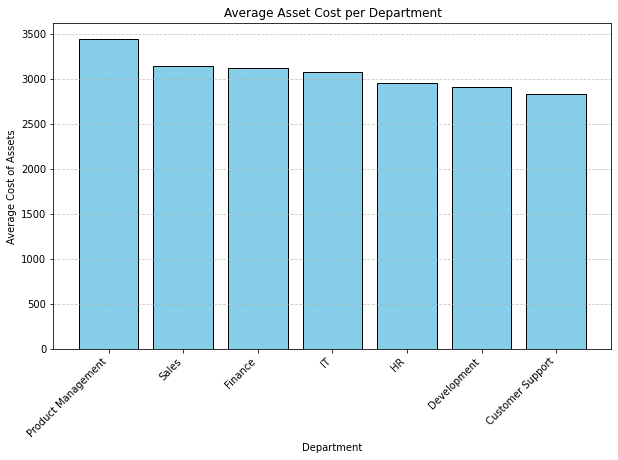

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
flag_data = pd.read_csv("csvs/flag-65.csv")

# Calculate the average asset cost per department
avg_cost_per_department = (
    flag_data.groupby("department")["cost"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(
    avg_cost_per_department["department"],
    avg_cost_per_department["cost"],
    color="skyblue",
    edgecolor="black",
)
plt.title("Average Asset Cost per Department")
plt.xlabel("Department")
plt.ylabel("Average Cost of Assets")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Generate JSON Description for the Insight

In [17]:
{
    "data_type": "comparative",
    "insight": "Product Management allocates the highest average spending on assets compared to other departments.",
    "insight_value": {
        "description": "Product Management leads in asset spending with an average asset cost of $3,448, followed closely by Sales and Finance, which also maintain relatively high asset investments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Asset Cost per Department",
        "x_axis": {
            "name": "Department",
            "value": "Departments including Product Management, Sales, Finance, IT, HR, Development, and Customer Support",
            "description": "This axis represents the different departments within the organization, showcasing their respective average asset costs.",
        },
        "y_axis": {
            "name": "Average Cost of Assets",
            "value": "Cost values from approximately $2,800 to $3,500",
            "description": "This axis displays the average asset cost for each department, revealing budget allocations for asset purchases.",
        },
        "description": "The bar chart illustrates that Product Management has the highest average asset cost, indicating a greater investment in assets for this department. Sales, Finance, and IT also have significant allocations, suggesting prioritization of resources to departments that are likely more asset-intensive.",
    },
    "question": "How do asset costs differ between departments, and which department has the highest average spending on assets?",
    "actionable_insight": "With Product Management, Sales, and Finance departments having higher average asset costs, this could inform resource allocation and procurement strategies to align investments with departmental needs. Regular assessments may help optimize asset spending, particularly if these departments’ performance relies heavily on newer or more specialized equipment.",
}

{'data_type': 'correlative',
 'insight': 'There is a positive correlation between Asset Purchase Dates and Warranty Periods',
 'insight_value': {'description': 'Statistically significant. Recently purchased assets exhibit increasingly longer warranty periods compared to assets purchased earlier, indicating a trend towards extending warranties over time.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Purchase Date of Assets and Warranty Periods',
  'x_axis': {'name': 'Purchase Date',
   'value': 'Date range from earliest to most recent purchases',
   'description': 'This axis represents the time of asset purchase, plotted chronologically.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis displays the warranty periods associated with each purchase date, illustrating how newer purchases tend to have longer warranties.'},
  'description': 'The scatter plot demonstrates a clear positi

### **Question 2: Is it a linear trend and can it be  regressed with noise?**


#### Plot regression analysis, trend in warranty period over purchase dates
This plot extends the previous analysis by not only displaying the scatter of warranty periods against their respective purchase dates but also incorporating a linear regression model to determine if there is a discernible linear trend

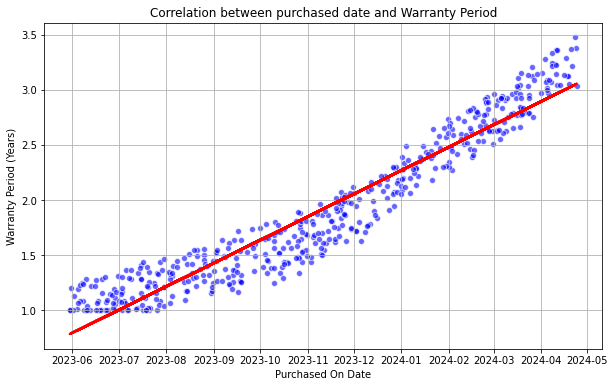

In [18]:
# Assuming 'df' is the DataFrame containing your data
df["warranty_expiration"] = pd.to_datetime(df["warranty_expiration"])
df["purchased_on"] = pd.to_datetime(df["purchased_on"])
# Calculate the warranty period in years
df['warranty_period_years'] = (df['warranty_expiration'] - df['purchased_on']).dt.days / 365

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['purchased_on'], df['warranty_period_years'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Correlation between purchased date and Warranty Period')
plt.xlabel('Purchased On Date')
plt.ylabel('Warranty Period (Years)')
plt.grid(True)
# Optionally, you can fit a linear regression line to emphasize the trend
# Using numpy for linear regression line
import numpy as np
# Convert dates to ordinal for regression
df['sys_updated_on_ordinal'] = df['purchased_on'].apply(lambda x: x.toordinal())
# Fit the regression
fit = np.polyfit(df['sys_updated_on_ordinal'], df['warranty_period_years'], 1)
fit_fn = np.poly1d(fit)
# Plot the regression line
plt.plot(df['purchased_on'], fit_fn(df['sys_updated_on_ordinal']), color='red', linewidth=2)

#### Generate JSON Description for the Insight

In [19]:
{
    "data_type": "predictive",
    "insight": "The Linear Regression Model is able to predicts Warranty Periods Based on Purchase Dates",
    "insight_value": {
        "description": "The linear regression analysis confirms a predictable relationship between asset purchase dates and warranty periods, with a trend indicating longer warranties for more recently purchased assets."
    },
    "plot": {
        "plot_type": "regression",
        "title": "Linear Regression of Warranty Periods Against Purchase Dates",
        "x_axis": {
            "name": "Purchase Date",
            "value": "Date range from earliest to most recent purchases",
            "description": "This axis represents the chronological order of asset purchases."
        },
        "y_axis": {
            "name": "Warranty Period (years)",
            "value": "Continuously variable warranty durations",
            "description": "This axis plots the warranty periods, with the regression line illustrating the linear trend."
        },
        "description": "The regression plot effectively shows a clear linear trend, indicating that newer assets tend to have longer warranties. The presence of noise suggests variability around the trend line, which could be due to factors such as different asset types or supplier agreements."
    },
    "question": "Is it a linear trend and can it be regressed with noise?",
    "actionable_insight": "Given the predictability of warranty periods based on purchase dates as evidenced by the linear regression model, the organization can anticipate warranty terms for future purchases. This foresight could be instrumental in negotiating terms with suppliers or choosing products that offer the best value in terms of warranty coverage. Further, by understanding the variability (noise) around the trend, procurement managers can refine their asset management strategies to account for exceptions and ensure robust handling of warranty terms."
}


{'data_type': 'predictive',
 'insight': 'The Linear Regression Model is able to predicts Warranty Periods Based on Purchase Dates',
 'insight_value': {'description': 'The linear regression analysis confirms a predictable relationship between asset purchase dates and warranty periods, with a trend indicating longer warranties for more recently purchased assets.'},
 'plot': {'plot_type': 'regression',
  'title': 'Linear Regression of Warranty Periods Against Purchase Dates',
  'x_axis': {'name': 'Purchase Date',
   'value': 'Date range from earliest to most recent purchases',
   'description': 'This axis represents the chronological order of asset purchases.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis plots the warranty periods, with the regression line illustrating the linear trend.'},
  'description': 'The regression plot effectively shows a clear linear trend, indicating that newer assets tend 

### **Question 3: What is the average cost of assets nearing warranty expiration in the next 6 months across different departments?**

#### Plotting Average Asset Cost by Department for Assets Nearing Warranty Expiration 
This analysis investigates the average cost of assets whose warranties will expire within the next six months, grouped by department. By focusing on assets nearing warranty end dates, departments can prioritize budget planning and inventory replacement, highlighting departments with potentially higher financial requirements for timely asset replacement. 

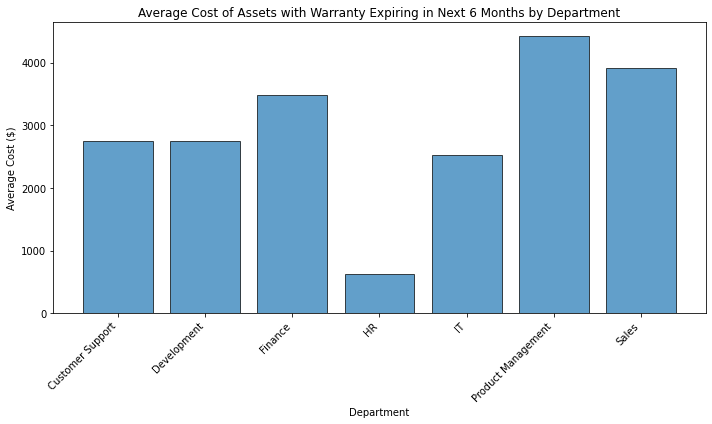

In [20]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Convert relevant date columns to datetime format
df["warranty_expiration"] = pd.to_datetime(
    df["warranty_expiration"], errors="coerce"
)
df["purchased_on"] = pd.to_datetime(df["purchased_on"], errors="coerce")

# Filter data for assets with warranties expiring in the next 6 months
current_date = datetime.now()
six_months_later = current_date + timedelta(days=180)
expiring_assets = df[
    (df["warranty_expiration"] <= six_months_later)
    & (df["warranty_expiration"] >= current_date)
]

# Calculate the average cost of expiring assets per department
avg_cost_per_department = (
    expiring_assets.groupby("department")["cost"].mean().reset_index()
)

# Plotting using bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    avg_cost_per_department["department"],
    avg_cost_per_department["cost"],
    alpha=0.7,
    edgecolor="black",
)
plt.title(
    "Average Cost of Assets with Warranty Expiring in Next 6 Months by Department"
)
plt.xlabel("Department")
plt.ylabel("Average Cost ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [21]:
{
    "data_type": "aggregative",
    "insight": "The Product Management and Sales departments have the highest average costs for assets nearing warranty expiration.",
    "insight_value": {
        "description": "Assets in Product Management and Sales have a higher average cost compared to other departments. This trend indicates a potential need for budget prioritization in these departments for future replacements."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Cost of Assets with Warranty Expiring in Next 6 Months by Department",
        "x_axis": {
            "name": "Department",
            "value": [
                "Customer Support",
                "Development",
                "Finance",
                "HR",
                "IT",
                "Product Management",
                "Sales",
            ],
            "description": "This axis represents the departments in the organization, showing how asset costs vary as warranties near expiration.",
        },
        "y_axis": {
            "name": "Average Cost ($)",
            "value": [2750, 2750.75, 3487.33, 627, 2524.06, 4419, 3907.85],
            "description": "The cost associated with assets per department as they approach warranty expiration.",
        },
        "description": "The bar plot shows that Product Management and Sales have the highest average costs, suggesting that these departments might prioritize budgets for asset replacements.",
    },
    "question": "What is the average cost of assets nearing warranty expiration in the next 6 months across different departments?",
    "actionable_insight": "The higher asset costs in Product Management and Sales indicate a strategic consideration for these departments in upcoming budget allocations. Departments like HR and IT have lower average costs, suggesting potentially lower immediate replacement needs. Organizations might consider proactive budget planning to address these upcoming expenses effectively.",
}

{'data_type': 'aggregative',
 'insight': 'The Product Management and Sales departments have the highest average costs for assets nearing warranty expiration.',
 'insight_value': {'description': 'Assets in Product Management and Sales have a higher average cost compared to other departments. This trend indicates a potential need for budget prioritization in these departments for future replacements.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Cost of Assets with Warranty Expiring in Next 6 Months by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Development',
    'Finance',
    'HR',
    'IT',
    'Product Management',
    'Sales'],
   'description': 'This axis represents the departments in the organization, showing how asset costs vary as warranties near expiration.'},
  'y_axis': {'name': 'Average Cost ($)',
   'value': [2750, 2750.75, 3487.33, 627, 2524.06, 4419, 3907.85],
   'description': 'The cost associated with assets per departmen

Question 4: What are the long-term effects of current asset assignment practices on employee performance and asset utilization?

"Objective": "The goal of this question is to predict the impact of current asset assignment practices on overall employee productivity and to prescribe changes to improve both asset utilization and employee satisfaction over time.",
"actionable_insight": "The findings from this analysis could lead to the development of a dynamic asset management system that not only aligns asset purchases with new hires but also schedules upgrades and rotations based on asset performance data and employee needs. This system could ensure that all employees, not just new hires, have access to the best possible tools at the right time, enhancing overall operational efficiency and employee satisfaction."

### Summary of Findings (Flag 65):

1. **Departmental Asset Spending**: From Question 1, it was found that Product Management allocates the highest average spending on assets, followed by Sales and Finance. This insight highlights the need for strategic budget allocation to align with departmental priorities and asset-intensive operations.

2. **Predictability of Warranty Periods**: Question 2 revealed a linear trend between asset purchase dates and warranty periods, suggesting that newer assets tend to have longer warranties. This predictability can guide procurement strategies to secure favorable warranty terms, optimizing asset lifecycle management.

3. **Asset Costs Nearing Warranty Expiration**: As per Question 3, Product Management and Sales departments have the highest average costs for assets nearing warranty expiration. This indicates a potential need for budget prioritization in these departments to manage upcoming asset replacements effectively.